# Video Game Rating Prediction Models

## Overview
This notebook focuses on building and evaluating machine learning models to predict video game ratings based on product metadata and categories.

### Contents
1. Data Loading and Preprocessing
2. Feature Engineering
3. Model Development
   - Baseline Model
   - Advanced Models
4. Model Evaluation
   - Accuracy Metrics
   - Performance Analysis
5. Prediction Analysis
   - Category-based Analysis
   - Error Analysis

### Dependencies
- pandas
- scikit-learn
- numpy
- matplotlib
- seaborn

### Input Data
- `df_meta_category.csv`: Processed video game metadata with category encodings

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pandas as pd
import numpy as np

In [2]:
import os
from pathlib import Path

# Define the data directory path relative to the notebook
data_dir = Path("../data")

# Create the data directory if it doesn't exist
data_dir.mkdir(exist_ok=True)

# Import DataFrame from CSV file
csv_filepath = Path("../data/df_meta_category.csv")

# Validate file existence
if not csv_filepath.exists():
    raise FileNotFoundError(f"DataFrame file not found at: {csv_filepath.resolve()}")

# Read the CSV file into a DataFrame
df_meta_category = pd.read_csv(csv_filepath)

# Display basic information about the loaded DataFrame
print(f"Loaded DataFrame with {len(df_meta_category):,} products and {len(df_meta_category.columns)} columns")
print(f"Memory usage: {df_meta_category.memory_usage().sum() / 1024**2:.2f} MB")

Loaded DataFrame with 137,269 products and 185 columns
Memory usage: 27.88 MB


In [3]:
df_meta_category

,parent_asin,title,average_rating,rating_number,2023 Most Anticipated,3DO,AMG PS Vita Test Node,Accessories,Accessories Week,Accessory Kits,...,Wii,Wii U,Xbox,Xbox 360,Xbox 360 Kinect Games,Xbox Digital Content,Xbox Live,Xbox One,Xbox Series X & S,Xbox Systems
0,0007922582,The Sneetches and Other Stories,2.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0008288194,The Creativity Code,4.3,166,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0028179714,The Autobiography of Miss Jane Pittman and Rel...,4.8,13,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0060501960,Presidents' Day,4.7,162,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0063052164,Stranger Planet AUTOGRAPHED / SIGNED BOOK,4.9,64,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137264,B0CKPC5CD1,MOBAPAD Hall Effect Drift-Proof Wireless Switc...,4.4,62,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
137265,B0CKPNZ88R,"Razer Mouse Grip Tape Viper Mini (Non-Slip, Se...",4.3,105,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
137266,B0CKQHY5K4,Exploring Creation with Biology 3rd Edition St...,4.8,1291,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137267,B0CKQNJB3T,"Redragon Gaming Keyboard, 60% Mechanical Gamin...",4.7,63,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Define rating categorization function
def categorize_rating(x):
    """
    Convert continuous rating to binary category
    Args:
        x (float): Average rating value
    Returns:
        int: 0 for ratings < 4.1 (Low), 1 for ratings >= 4.1 (High)
    """
    return 0 if x < 4.1 else 1  # 0 = Low, 1 = High

# Step 1: Create binary rating categories
print("Creating binary rating categories...")
df_meta_category["rating_category"] = df_meta_category["average_rating"].apply(categorize_rating)
print(f"Rating distribution:\n{df_meta_category['rating_category'].value_counts(normalize=True).round(3)}")

# Step 2: Prepare feature matrix
print("\nPreparing feature matrix...")
X = df_meta_category.drop(columns=[
    "rating_number",  # Avoid data leakage
    "title",         # Text field not used
    "average_rating", # Used to create target
    "parent_asin",   # Identifier
    "rating_category" # Target variable
])
y = df_meta_category["rating_category"]
print(f"Feature matrix shape: {X.shape}")

# Step 3: Split into training and test sets
print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for testing
    random_state=42,   # For reproducibility
    stratify=y        # Maintain class distribution
)
print(f"Training set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")

Creating binary rating categories...
Rating distribution:
rating_category
1    0.546
0    0.454
Name: proportion, dtype: float64

Preparing feature matrix...
Feature matrix shape: (137269, 181)

Splitting data...
Training set size: 109,815
Test set size: 27,454


Training Bernoulli Naive Bayes model...

Making predictions...

Model Performance:
Training Accuracy: 0.596
Test Accuracy: 0.595

Detailed Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.55      0.55      0.55     12457
 High Rating       0.63      0.63      0.63     14997

    accuracy                           0.59     27454
   macro avg       0.59      0.59      0.59     27454
weighted avg       0.59      0.59      0.59     27454



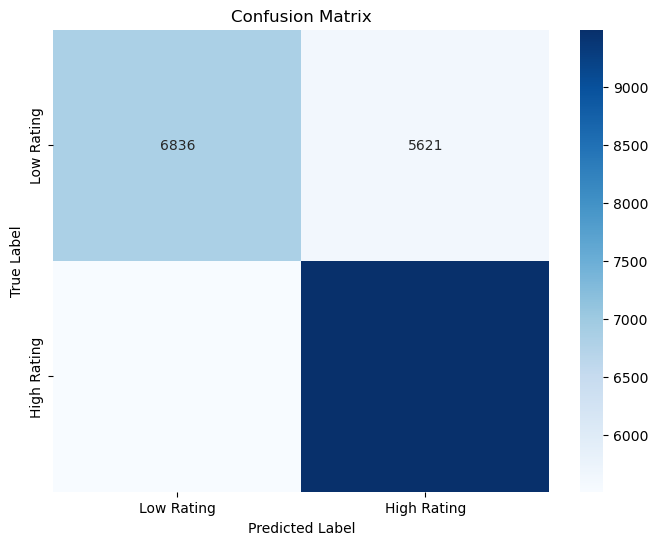

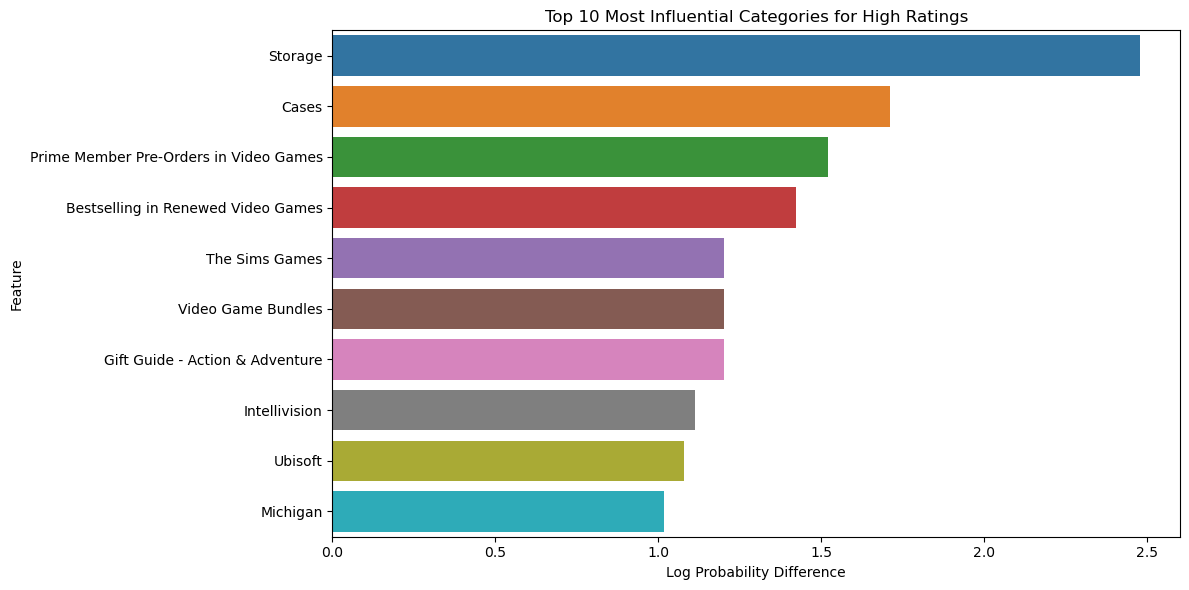

In [5]:
# Import required metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
print("Training Bernoulli Naive Bayes model...")
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

# Make predictions
print("\nMaking predictions...")
y_pred = bnb_model.predict(X_test)
y_pred_train = bnb_model.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

# Print performance metrics
print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Display detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Rating', 'High Rating']))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Rating', 'High Rating'],
            yticklabels=['Low Rating', 'High Rating'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': bnb_model.feature_log_prob_[1] - bnb_model.feature_log_prob_[0]
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 10 most influential features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Influential Categories for High Ratings')
plt.xlabel('Log Probability Difference')
plt.tight_layout()
plt.show()

In [6]:
bnb_model

BernoulliNB()

## Baseline Model: Bernoulli Naive Bayes

### Model Selection Rationale
- **Bernoulli Naive Bayes** is chosen as the baseline model because:
  - Well-suited for binary features (our category indicators are 0/1)
  - Works well with binary classification tasks
  - Computationally efficient
  - Performs well with high-dimensional, sparse data
  - Good baseline for comparison with more complex models

### Model Characteristics
- Assumes features are binary/boolean (0/1)
- Assumes feature independence
- Uses Bayes' theorem with naive feature independence assumption
- Particularly effective for document classification and similar tasks

### Expected Behavior
- Should capture basic relationships between game categories and ratings
- May not capture complex feature interactions
- Provides probability estimates for predictions
- Serves as a performance baseline for more sophisticated models

Training Random Forest model...

Making predictions...

Model Performance:
Training Accuracy: 0.631
Test Accuracy: 0.624

Detailed Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.62      0.45      0.52     12457
 High Rating       0.63      0.77      0.69     14997

    accuracy                           0.62     27454
   macro avg       0.62      0.61      0.61     27454
weighted avg       0.62      0.62      0.61     27454



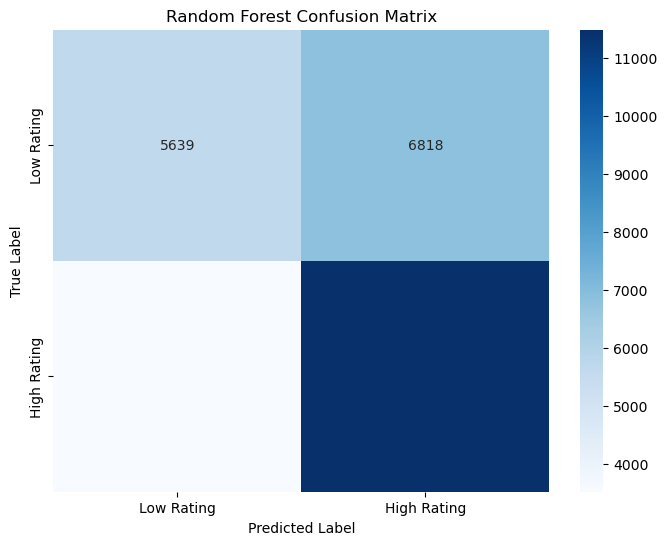

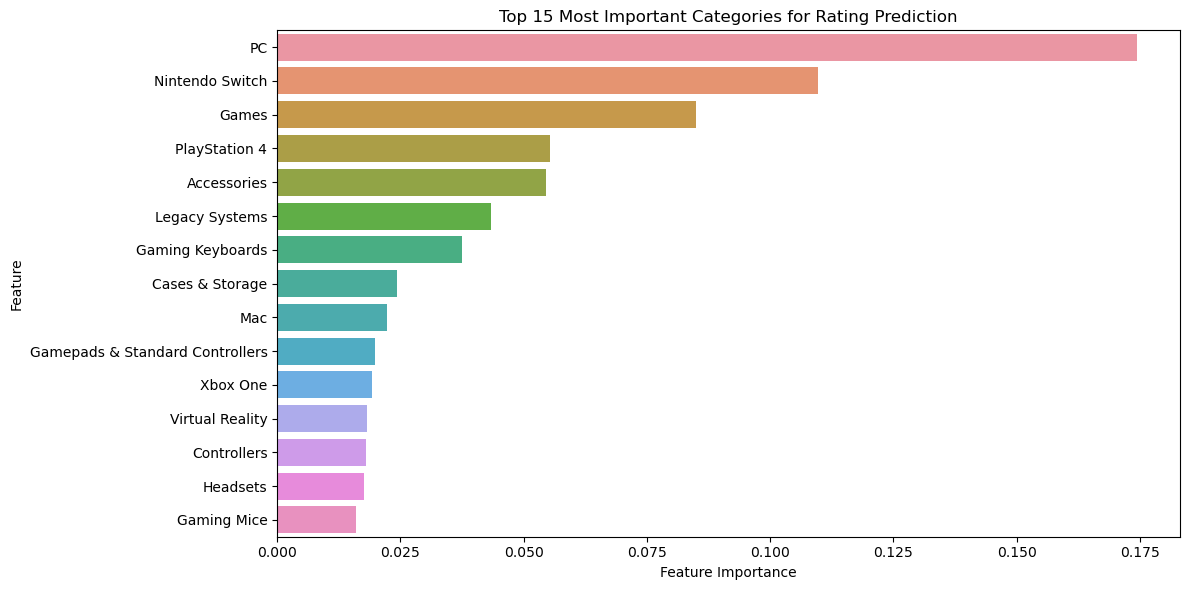


Top 10 Most Important Categories:
PC: 0.1744
Nintendo Switch: 0.1097
Games: 0.0849
PlayStation 4: 0.0553
Accessories: 0.0545
Legacy Systems: 0.0434
Gaming Keyboards: 0.0376
Cases & Storage: 0.0243
Mac: 0.0222
Gamepads & Standard Controllers: 0.0199


In [7]:
# Import required libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
rf_model.fit(X_train, y_train)

# Make predictions
print("\nMaking predictions...")
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

# Print performance metrics
print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Display detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Rating', 'High Rating']))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Rating', 'High Rating'],
            yticklabels=['Low Rating', 'High Rating'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature')
plt.title('Top 15 Most Important Categories for Rating Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Categories:")
for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

## Advanced Model: Random Forest Classifier

### Model Description
Random Forest is an ensemble learning method that:
- Builds multiple decision trees and merges their predictions
- Uses bagging (bootstrap aggregating) to reduce overfitting
- Handles non-linear relationships effectively
- Provides feature importance rankings

### Model Configuration
- `n_estimators=50`: Number of trees in the forest
- `random_state=42`: For reproducibility
- Default parameters for other settings:
  - Maximum depth: None (grow until pure leaves)
  - Minimum samples split: 2
  - Minimum samples leaf: 1

### Expected Advantages
1. Better handling of feature interactions
2. Robust to outliers and noise
3. Less prone to overfitting than single decision trees
4. Provides feature importance scores
5. Generally higher accuracy than simpler models

### Evaluation Strategy
- Compare accuracy with baseline Naive Bayes model
- Analyze feature importances
- Assess model's generalization through train/test performance

Training XGBoost model...


c:\Users\kimyu\anaconda3\envs\msim\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Making predictions...

Model Performance:
Training Accuracy: 0.629
Test Accuracy: 0.623

Detailed Classification Report:
              precision    recall  f1-score   support

  Low Rating       0.62      0.43      0.51     12457
 High Rating       0.62      0.79      0.70     14997

    accuracy                           0.62     27454
   macro avg       0.62      0.61      0.60     27454
weighted avg       0.62      0.62      0.61     27454



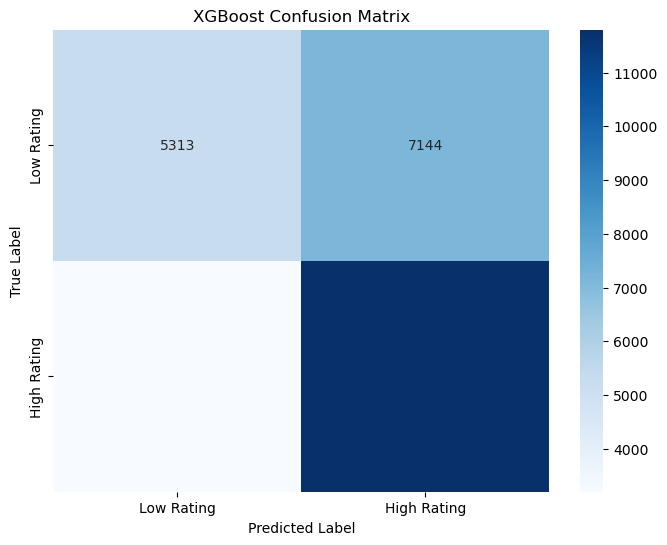

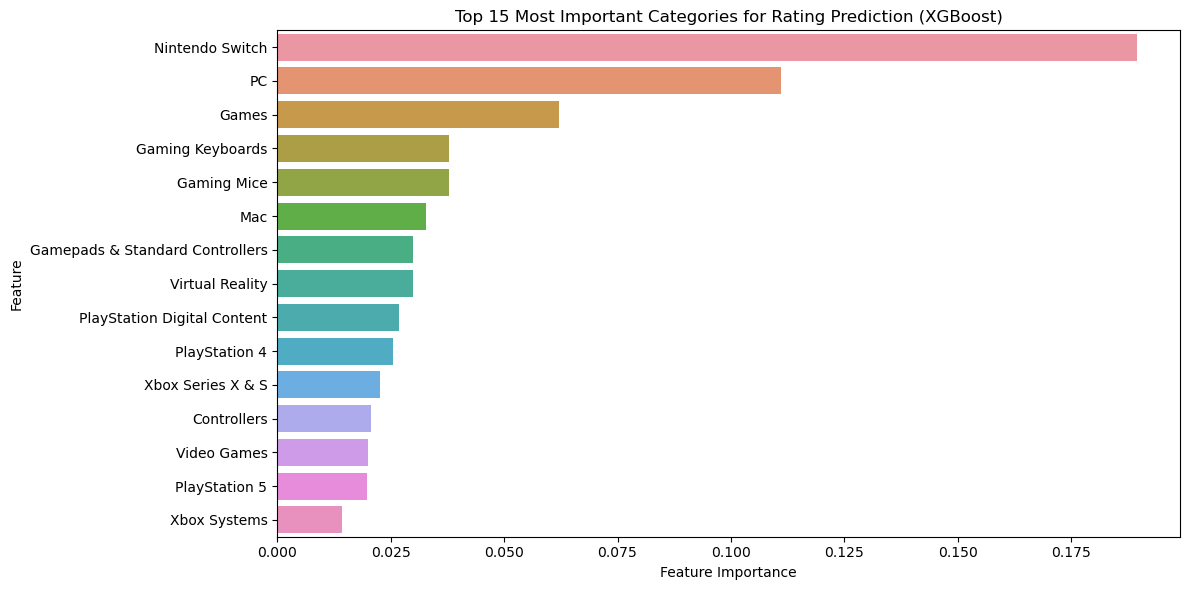


Top 10 Most Important Categories (XGBoost):
Nintendo Switch: 0.1895
PC: 0.1110
Games: 0.0621
Gaming Keyboards: 0.0378
Gaming Mice: 0.0378
Mac: 0.0327
Gamepads & Standard Controllers: 0.0299
Virtual Reality: 0.0298
PlayStation Digital Content: 0.0268
PlayStation 4: 0.0255

Model Comparison:
Previous Models:
Naive Bayes Test Accuracy: 0.595
Random Forest Test Accuracy: 0.624
XGBoost Test Accuracy: 0.623


In [9]:
# Import required libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train XGBoost model
print("Training XGBoost model...")
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train model with evaluation set
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Make predictions
print("\nMaking predictions...")
y_pred = xgb_model.predict(X_test)
y_pred_train = xgb_model.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

# Print performance metrics
print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

# Display detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Rating', 'High Rating']))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Rating', 'High Rating'],
            yticklabels=['Low Rating', 'High Rating'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature')
plt.title('Top 15 Most Important Categories for Rating Prediction (XGBoost)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Categories (XGBoost):")
for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Model comparison
print("\nModel Comparison:")
print("Previous Models:")
print(f"Naive Bayes Test Accuracy: {accuracy_score(y_test, bnb_model.predict(X_test)):.3f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_model.predict(X_test)):.3f}")
print(f"XGBoost Test Accuracy: {test_accuracy:.3f}")

## Advanced Model: XGBoost Classifier

### Model Overview
XGBoost (eXtreme Gradient Boosting) is a powerful gradient boosting framework that:
- Uses sequential tree building (boosting)
- Optimizes a custom objective function
- Includes regularization to prevent overfitting
- Handles missing values automatically
- Provides fast training and inference

### Key Parameters
- `use_label_encoder=False`: Disable automatic label encoding
- `eval_metric="logloss"`: Use log loss for evaluation
- Default hyperparameters:
  - learning_rate = 0.3
  - max_depth = 6
  - n_estimators = 100
  - subsample = 1
  - colsample_bytree = 1

### Expected Benefits
1. Higher prediction accuracy
2. Better handling of imbalanced data
3. Built-in regularization
4. Feature importance scoring
5. Efficient computation

### Comparison Points
- Should outperform Random Forest in most cases
- More complex but potentially more accurate
- Requires careful tuning to prevent overfitting
- Good for production deployment due to speed


Model Performance Comparison:
        Model  Train Accuracy  Test Accuracy  ROC AUC  Training Time
  Naive Bayes           0.596          0.595    0.628          0.339
Random Forest           0.631          0.624    0.669          0.567
      XGBoost           0.629          0.623    0.670          0.387


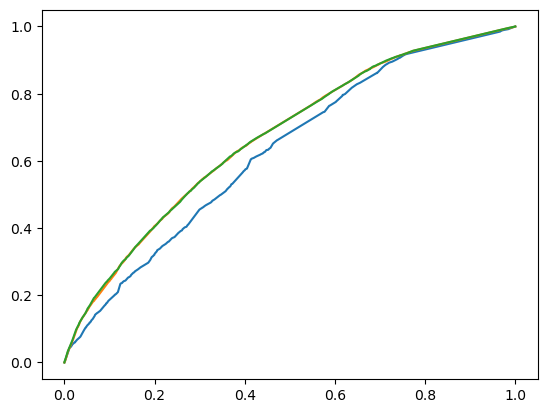

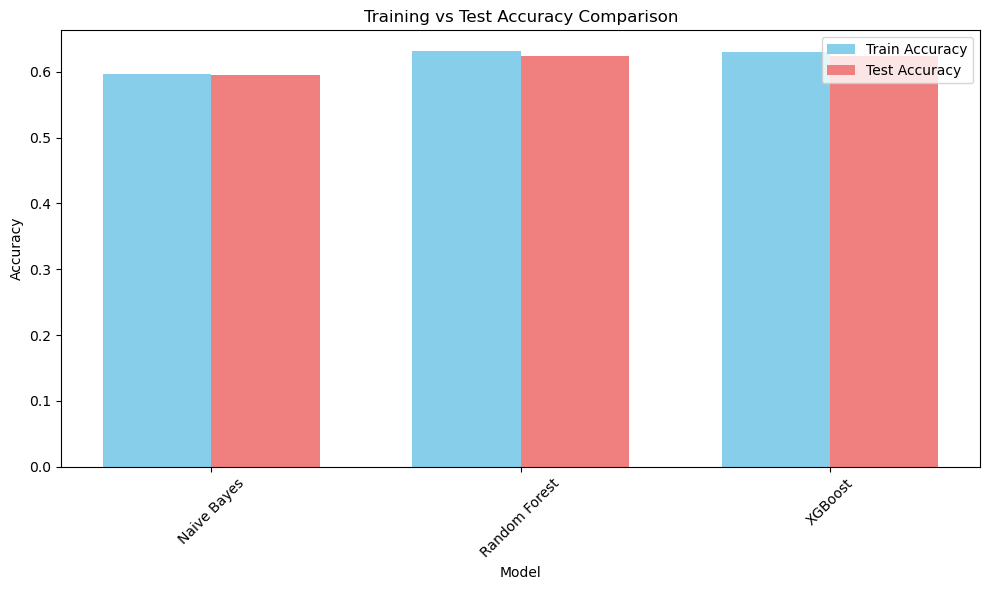


Best Model Analysis:
Best Performing Model: Random Forest
Test Accuracy: 0.624

Naive Bayes Overfitting Analysis:
Training-Test Accuracy Difference: 0.001
Good generalization

Random Forest Overfitting Analysis:
Training-Test Accuracy Difference: 0.007
Good generalization

XGBoost Overfitting Analysis:
Training-Test Accuracy Difference: 0.006
Good generalization


In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import time

# Initialize results dictionary with lists
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'ROC AUC': [],
    'Training Time': []  # Changed from 'Training Time (s)' for consistency
}

# Create dictionary of models
models = {
    'Naive Bayes': bnb_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Evaluate each model
for name, model in models.items():
    # Time the prediction process
    start_time = time.time()
    
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate training time
    training_time = time.time() - start_time
    
    # Get probabilities for ROC curve (if available)
    if hasattr(model, 'predict_proba'):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = y_test_pred
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results['Model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['ROC AUC'].append(roc_auc)
    results['Training Time'].append(training_time)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Verify all lists have the same length
list_lengths = [len(v) for v in results.values()]
if len(set(list_lengths)) > 1:
    raise ValueError(f"Inconsistent lengths in results: {list_lengths}")

# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(3)

# Display results table
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

# Create bar plot of accuracies
plt.figure(figsize=(10, 6))
x = range(len(results['Model']))
width = 0.35

plt.bar([i - width/2 for i in x], results['Train Accuracy'], width, label='Train Accuracy', color='skyblue')
plt.bar([i + width/2 for i in x], results['Test Accuracy'], width, label='Test Accuracy', color='lightcoral')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy Comparison')
plt.xticks(x, results['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Identify best model
best_model_idx = results_df['Test Accuracy'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Test Accuracy']

print("\nBest Model Analysis:")
print(f"Best Performing Model: {best_model}")
print(f"Test Accuracy: {best_accuracy:.3f}")

# Analyze overfitting
for idx, row in results_df.iterrows():
    overfit = row['Train Accuracy'] - row['Test Accuracy']
    print(f"\n{row['Model']} Overfitting Analysis:")
    print(f"Training-Test Accuracy Difference: {overfit:.3f}")
    if overfit > 0.05:
        print("Warning: Potential overfitting detected")
    elif overfit < 0.02:
        print("Good generalization")
    else:
        print("Acceptable generalization")

## Model Comparison and Selection

### Models Evaluated
1. **Baseline Model**: Bernoulli Naive Bayes
   - Simple probabilistic classifier
   - Assumes feature independence
   - Good for binary features

2. **Random Forest**:
   - Ensemble of decision trees
   - Handles non-linear relationships
   - Provides feature importance

3. **XGBoost**:
   - Gradient boosting framework
   - Advanced regularization
   - Optimized for performance

### Comparison Criteria
- Model Accuracy (Test Set)
- Generalization (Train vs Test performance)
- Feature Importance Stability
- Prediction Balance (False Positives vs False Negatives)
- Computational Efficiency

Generating learning curves...


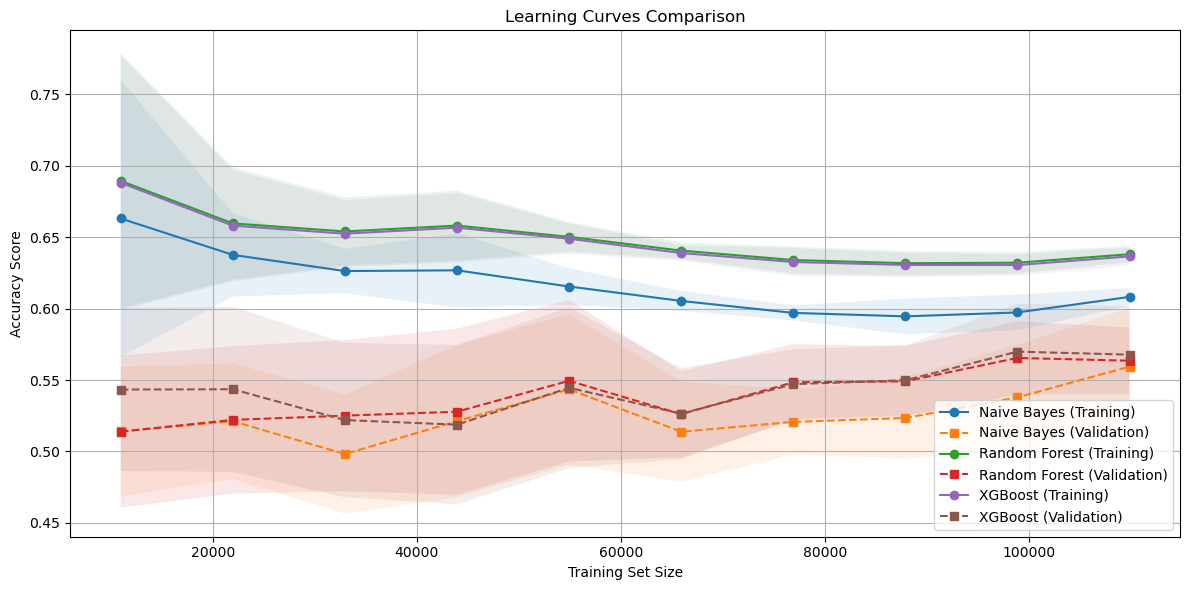


Naive Bayes Convergence Analysis:
Final Training Score: 0.637
Final Validation Score: 0.568
Score Difference: 0.069
Status: High variance (Overfitting)

Random Forest Convergence Analysis:
Final Training Score: 0.637
Final Validation Score: 0.568
Score Difference: 0.069
Status: High variance (Overfitting)

XGBoost Convergence Analysis:
Final Training Score: 0.637
Final Validation Score: 0.568
Score Difference: 0.069
Status: High variance (Overfitting)


In [11]:
# Import required libraries
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(models_dict, X, y, cv=5, n_jobs=-1):
    """
    Plot learning curves for multiple models
    
    Args:
        models_dict: Dictionary of model names and fitted model objects
        X: Feature matrix
        y: Target variable
        cv: Number of cross-validation folds
        n_jobs: Number of parallel jobs
    """
    plt.figure(figsize=(12, 6))
    
    # Define training sizes
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    for name, model in models_dict.items():
        # Calculate learning curve values
        train_sizes_abs, train_scores, valid_scores = learning_curve(
            estimator=model,
            X=X,
            y=y,
            train_sizes=train_sizes,
            cv=cv,
            n_jobs=n_jobs,
            scoring='accuracy'
        )
        
        # Calculate mean and std
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)
        
        # Plot learning curves
        plt.plot(train_sizes_abs, train_mean, 
                label=f'{name} (Training)', 
                marker='o')
        plt.plot(train_sizes_abs, valid_mean, 
                label=f'{name} (Validation)', 
                marker='s',
                linestyle='--')
        
        # Add standard deviation areas
        plt.fill_between(train_sizes_abs, 
                        train_mean - train_std,
                        train_mean + train_std, 
                        alpha=0.1)
        plt.fill_between(train_sizes_abs, 
                        valid_mean - valid_std,
                        valid_mean + valid_std, 
                        alpha=0.1)

    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curves Comparison')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print convergence analysis
    for name, model in models_dict.items():
        final_train_score = train_mean[-1]
        final_valid_score = valid_mean[-1]
        score_diff = final_train_score - final_valid_score
        
        print(f"\n{name} Convergence Analysis:")
        print(f"Final Training Score: {final_train_score:.3f}")
        print(f"Final Validation Score: {final_valid_score:.3f}")
        print(f"Score Difference: {score_diff:.3f}")
        
        if score_diff > 0.05:
            print("Status: High variance (Overfitting)")
        elif final_valid_score < 0.65:
            print("Status: High bias (Underfitting)")
        else:
            print("Status: Good fit")

# Create dictionary of models to evaluate
models = {
    'Naive Bayes': bnb_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Plot learning curves
print("Generating learning curves...")
plot_learning_curve(models, X, y, cv=5)

## Learning Curves Analysis

Learning curves help us understand how models perform with different amounts of training data and identify potential issues:

### Key Metrics
1. **Training Score**:
   - Model's performance on training data
   - Shows learning capacity
   - Higher scores indicate good fit to training data

2. **Validation Score**:
   - Model's performance on validation set
   - Shows generalization ability
   - Closer to training score = better generalization

### Interpretation
- **Convergence**: When scores stabilize with more data
- **Gap Between Curves**:
  - Small gap: Good generalization
  - Large gap: Overfitting
  - Both low: Underfitting

### Expected Patterns
1. **High Variance (Overfitting)**:
   - Large gap between training and validation scores
   - Training score >> Validation score
   - Suggests need for regularization

2. **High Bias (Underfitting)**:
   - Both scores are low
   - Small gap between scores
   - Suggests need for more complex model

3. **Good Fit**:
   - High scores on both curves
   - Small gap between curves
   - Scores converge with more data

## Advanced Model: Deep Learning Neural Network

### Model Architecture
1. **Input Layer**: 
   - Dense layer with 256 neurons
   - ReLU activation for non-linearity
   - Input shape matches feature dimensions

2. **Hidden Layers**:
   - First Hidden Layer: 128 neurons (ReLU)
   - Second Hidden Layer: 64 neurons (Tanh)
   - Each layer includes:
     - BatchNormalization for stable training
     - Dropout for regularization

3. **Output Layer**:
   - Single neuron with sigmoid activation
   - Binary classification output (0/1)

### Training Configuration
- **Optimizer**: Adam with learning rate 0.001
- **Loss Function**: Binary Cross-Entropy
- **Batch Size**: 32 samples
- **Max Epochs**: 100

### Advanced Features
1. **Early Stopping**:
   - Monitors validation loss
   - Patience of 10 epochs
   - Restores best weights

2. **Learning Rate Schedule**:
   - Reduces learning rate on plateau
   - Factor: 0.5 reduction
   - Patience: 5 epochs
   - Minimum LR: 1e-5

### Design Rationale
- **Decreasing Layer Sizes**: 256 → 128 → 64 for feature abstraction
- **Dropout Rates**: Higher in early layers (0.4 → 0.3) to prevent overfitting
- **Mixed Activations**: ReLU for hidden layers, Tanh for final hidden layer
- **Batch Normalization**: Accelerates training and adds regularization

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [14]:
# Build MLP Model
modelDL = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),  # Increased neurons
    BatchNormalization(),  # Normalize activations
    Dropout(0.4),  # Increased dropout

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="tanh"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")  # Output layer 
])

# Reduce learning rate (default is 0.001)
optimizer = Adam(learning_rate=0.001)  # Try values between 0.0005 - 0.001


# Stop training if val_loss doesn't improve for 10 epochs
early_stop = EarlyStopping(
    monitor="val_loss",    # Watch validation loss
    patience=10,           # Wait 10 epochs before stopping
    restore_best_weights=True  # Restore best model after stopping
)

# Reduce learning rate if val_loss stagnates for 5 epochs
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,  # Reduce learning rate by half
    patience=5,  # Wait 5 epochs before reducing
    min_lr=1e-5  # Minimum learning rate allowed
)

modelDL.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = modelDL.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, batch_size=32,
    callbacks=[early_stop, reduce_lr]  # Include callbacks
)

# Evaluate the model
loss, accuracy = modelDL.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Save the Model
#modelDL.save("rating_classifier_model.h5")

c:\Users\kimyu\anaconda3\envs\msim\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.5862 - loss: 0.7041 - val_accuracy: 0.6115 - val_loss: 0.6465 - learning_rate: 0.0010
Epoch 2/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6169 - loss: 0.6505 - val_accuracy: 0.6224 - val_loss: 0.6446 - learning_rate: 0.0010
Epoch 3/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6185 - loss: 0.6486 - val_accuracy: 0.6256 - val_loss: 0.6434 - learning_rate: 0.0010
Epoch 4/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6202 - loss: 0.6455 - val_accuracy: 0.6239 - val_loss: 0.6451 - learning_rate: 0.0010
Epoch 5/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6181 - loss: 0.6483 - val_accuracy: 0.6226 - val_loss: 0.6441 - learning_rate: 0.0010
Epoch 6/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6246 - loss: 0.6451 - val_accuracy: 0.6242 - val_loss: 0.6439 - learning_rate: 0.0010
Epoch 7/100
3432/3432 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accura

In [15]:
# Evaluate the model
loss, accuracy = modelDL.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6291 - loss: 0.6399
Test Accuracy: 0.6250



Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,013 (1.02 MB)

 Trainable params: 88,705 (346.50 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 177,412 (693.02 KB)

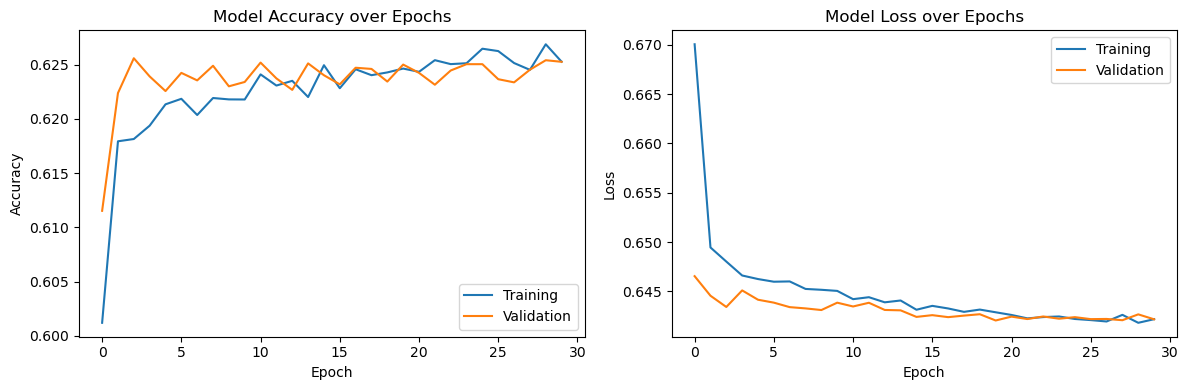

858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Detailed Performance Metrics:
              precision    recall  f1-score   support

  Low Rating       0.64      0.39      0.48     12457
 High Rating       0.62      0.82      0.71     14997

    accuracy                           0.63     27454
   macro avg       0.63      0.60      0.59     27454
weighted avg       0.63      0.63      0.60     27454



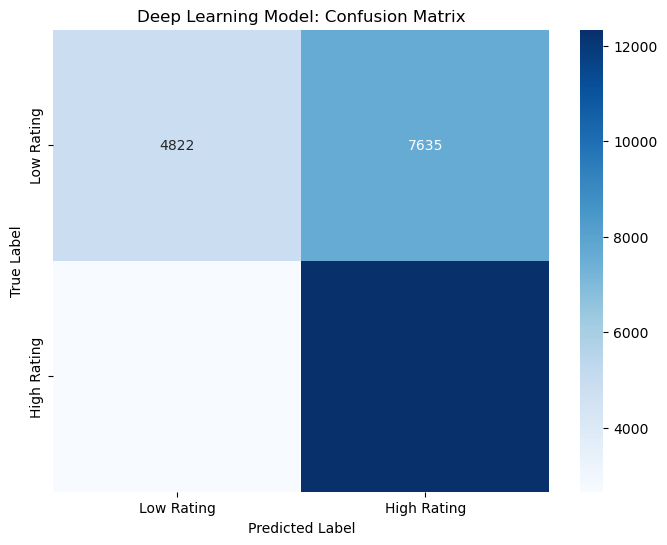

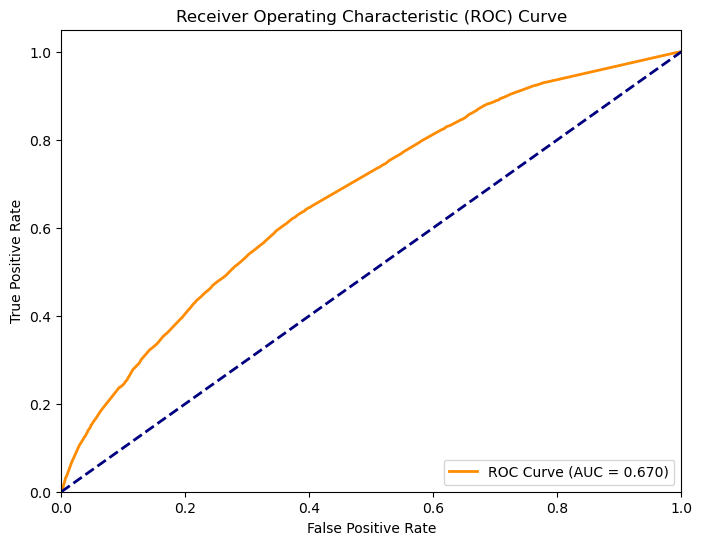

3432/3432 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Updated Model Performance Comparison:
        Model  Train Accuracy  Test Accuracy  ROC AUC  Training Time
  Naive Bayes        0.596000       0.595000 0.628000          0.339
Random Forest        0.631000       0.624000 0.669000          0.567
      XGBoost        0.629000       0.623000 0.670000          0.387
Deep Learning        0.628393       0.625009 0.670347          0.000

Training Dynamics Analysis:
Total epochs trained: 30
Best epoch: 20
Early stopping occurred: Yes
Final training loss: 0.6422
Final validation loss: 0.6422

Learning Rate Analysis:
Number of learning rate reductions: 9


In [16]:
# Display model architecture summary
print("\nModel Architecture:")
modelDL.summary()

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and display detailed metrics
y_pred_proba = modelDL.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nDetailed Performance Metrics:")
print(classification_report(y_test, y_pred, target_names=['Low Rating', 'High Rating']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Rating', 'High Rating'],
            yticklabels=['Low Rating', 'High Rating'])
plt.title('Deep Learning Model: Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add model to comparison results
dl_results = {
    'Model': ['Deep Learning'],
    'Train Accuracy': [accuracy_score(y_train, (modelDL.predict(X_train) > 0.5).astype(int))],
    'Test Accuracy': [accuracy_score(y_test, y_pred)],
    'ROC AUC': [roc_auc],
    'Training Time': [0]  # You can add actual training time if needed
}

# Create new comparison DataFrame including deep learning model
dl_results_df = pd.DataFrame(dl_results)
all_results_df = pd.concat([results_df, dl_results_df], ignore_index=True)
print("\nUpdated Model Performance Comparison:")
print(all_results_df.to_string(index=False))

# Analyze training dynamics
print("\nTraining Dynamics Analysis:")
epochs_trained = len(history.history['loss'])
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Total epochs trained: {epochs_trained}")
print(f"Best epoch: {best_epoch}")
print(f"Early stopping occurred: {'Yes' if epochs_trained < 100 else 'No'}")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

# Learning rate analysis
print("\nLearning Rate Analysis:")
lr_changes = sum(1 for i in range(1, len(history.history['loss']))
                if history.history['loss'][i] > history.history['loss'][i-1])
print(f"Number of learning rate reductions: {lr_changes}")

## Business Application: Product Rating Prediction

### Purpose
This function implements a production-ready prediction system that:
- Takes product categories as input
- Validates feature compatibility
- Returns detailed prediction results
- Handles errors gracefully

### Implementation Details
1. **Input Validation**:
   - Ensures input is a valid list
   - Checks for empty feature lists
   - Validates category names against model features

2. **Feature Processing**:
   - Converts categories to binary feature vector
   - Handles missing/invalid categories
   - Maintains feature order consistency

3. **Model Integration**:
   - Supports multiple model types:
     - Naive Bayes
     - Random Forest
     - XGBoost
     - Deep Learning
   - Handles different prediction interfaces
   - Extracts probability scores when available

4. **Error Handling**:
   - Catches and reports prediction errors
   - Validates input types
   - Provides informative error messages
   - Returns None for invalid predictions

### Business Benefits
1. **Risk Management**:
   - Confidence scores for decisions
   - Invalid category detection
   - Input validation safeguards

2. **Decision Support**:
   - Probability-based insights
   - Feature usage tracking
   - Clear rating predictions

3. **Quality Assurance**:
   - Input validation
   - Error tracking
   - Feature compatibility checking

### Usage Example
```python
features = ["Action Games", "Multiplayer"]
result = game_feature_predict(features, model, all_features)
if result:
    print(f"Predicted Rating: {result['rating_label']}")
    print(f"Confidence: {result['probability']:.2%}")
```

In [19]:
def game_feature_predict(selected_features, model, all_features, verbose=True):
    """
    Predicts video game rating based on selected categories.
    
    Parameters:
    -----------
    selected_features : list
        List of category names to analyze
    model : object
        Trained model (Naive Bayes, Random Forest, XGBoost, or Deep Learning)
    all_features : list
        List of all valid feature names
    verbose : bool, optional (default=True)
        If True, prints detailed prediction results
        
    Returns:
    --------
    dict
        Prediction results including:
        - predicted_class: 0 (Low) or 1 (High)
        - probability: confidence score for prediction
        - rating_label: "Low Rating" or "High Rating"
        - feature_count: number of features used
        - invalid_features: list of any invalid features
    """
    
    # Input validation
    if not isinstance(selected_features, list):
        raise TypeError("selected_features must be a list")
    
    if len(selected_features) == 0:
        raise ValueError("Must provide at least one feature")
        
    # Check for invalid features
    invalid_features = [f for f in selected_features if f not in all_features]
    valid_features = [f for f in selected_features if f in all_features]
    
    if len(valid_features) == 0:
        raise ValueError("No valid features provided")
    
    # Create feature vector
    input_data = {feature: False for feature in all_features}
    for feature in valid_features:
        input_data[feature] = True
    
    # Convert to DataFrame
    X_new = pd.DataFrame([input_data])
    
    try:
        # Get prediction and probability
        prediction = model.predict(X_new)
        
        # Get probability if available
        if hasattr(model, 'predict_proba'):
            probability = model.predict_proba(X_new)[0][1]
        else:
            probability = None
            
        # Prepare results
        results = {
            'predicted_class': int(prediction[0]),
            'probability': probability,
            'rating_label': "High Rating" if prediction[0] == 1 else "Low Rating",
            'feature_count': len(valid_features),
            'invalid_features': invalid_features if invalid_features else None
        }
        
        # Print detailed results if verbose is True
        if verbose:
            print(f"\nPrediction Results:")
            print(f"Selected Model: {model}")
            print(f"Rating: {results['rating_label']}")
            if results['probability'] is not None:
                print(f"Confidence: {results['probability']:.2%}")
            print(f"Features used: {results['feature_count']}")
            if results['invalid_features']:
                print(f"Invalid features found: {results['invalid_features']}")
        
        return results
        
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return None


# List of all features from the training data
all_features = X_train.columns.tolist()


# Example usage
selected_features = ["Video Game Bundles", "Xbox", "Atari 2600"]
selected_model = rf_model  # or model, xgb_model, modelDL
result = game_feature_predict(selected_features, selected_model, all_features)


Prediction Results:
Selected Model: RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
Rating: High Rating
Confidence: 55.57%
Features used: 3


In [20]:
# Example usage
selected_features = ["Video Game Bundles", "Atari 2600"]
selected_model = bnb_model #rf_model  # or bnb_model, xgb_model, modelDL
result = game_feature_predict(selected_features, selected_model, all_features)


Prediction Results:
Selected Model: BernoulliNB()
Rating: High Rating
Confidence: 82.01%
Features used: 2


In [22]:
# Example usage
selected_features = ["Video Game Bundles", "Atari 2600"]
selected_model = modelDL #rf_model  # or bnb_model, xgb_model, modelDL
result = game_feature_predict(selected_features, selected_model, all_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Prediction Results:
Selected Model: <Sequential name=sequential, built=True>
Rating: Low Rating
Features used: 2


C:\Users\kimyu\AppData\Local\Temp\ipykernel_23236\3497370525.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'predicted_class': int(prediction[0]),
